In [2]:
import pandas as pd
import re
from IPython.display import display
from dateutil.parser import parse
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

In [3]:
selected_anime = pd.read_csv('./Data/anime.csv')
selected_anime_with_synopsis = pd.read_csv('./Data/anime_with_synopsis.csv')

In [4]:
display(selected_anime_with_synopsis.head())
display(selected_anime.head())

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [5]:
selected_anime['Genres set'] = selected_anime['Genres'].apply(lambda x: set((str(x)).strip().split(', '))).apply(lambda x: x - {'nan'})

In [6]:
def intrepred_date(d_text: str):
    try:
        d_text = d_text.strip()
        return parse(d_text)
    except:
        return pd.NA

def get_dates(text: str):
    # split with "to"
    result = re.split('to', text)
    if len(result) != 2:
        result.append('')

    return tuple(map(intrepred_date, result))


In [7]:
selected_anime[['Start Aired', 'End Aired']] = pd.DataFrame(selected_anime.Aired.apply(get_dates).tolist())
selected_anime = selected_anime[~selected_anime['Start Aired'].isna()]
selected_anime['Start Year'] = selected_anime['Start Aired'].apply(lambda x: x.year)
selected_anime.shape
selected_anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Genres set',
       'Start Aired', 'End Aired', 'Start Year'],
      dtype='object')

In [8]:
selected_anime[['MAL_ID', 'Start Year', 'Score', 'Genres set']]

,MAL_ID,Start Year,Score,Genres set
0,1,1998,8.78,"{Comedy, Space, Sci-Fi, Drama, Action, Adventure}"
1,5,2001,8.39,"{Space, Sci-Fi, Drama, Action, Mystery}"
2,6,1998,8.24,"{Comedy, Sci-Fi, Drama, Action, Adventure, Sho..."
3,7,2002,7.27,"{Magic, Police, Drama, Supernatural, Action, M..."
4,8,2004,6.98,"{Fantasy, Adventure, Supernatural, Shounen}"
...,...,...,...,...
17556,48480,2021,Unknown,"{Fantasy, Adventure}"
17557,48481,2021,Unknown,"{Supernatural, Mystery, Adventure}"
17558,48483,2021,Unknown,"{Comedy, Supernatural, Horror}"
17559,48488,2021,Unknown,"{Horror, Dementia, Supernatural, Thriller, Psy..."


In [9]:
anime_to_transform = selected_anime[['MAL_ID', 'Start Year', 'Score', 'Genres set']].reset_index()
anime_to_transform = anime_to_transform[anime_to_transform['Score'] != 'Unknown']
anime_to_transform['Score'] = anime_to_transform['Score'].astype(float)

In [10]:
binarizer = MultiLabelBinarizer()
genres_binarized = pd.DataFrame(binarizer.fit_transform(anime_to_transform['Genres set']))
genres_binarized.columns = binarizer.classes_
genres_binarized.shape

(12414, 44)

In [11]:
genres_binarized = genres_binarized.replace({0: np.nan})

In [12]:
score_by_genres = anime_to_transform['Score'].to_numpy().reshape((-1, 1)) * genres_binarized

In [13]:
score_by_genres_years = pd.concat([ anime_to_transform['Start Year'].reset_index(drop=True), score_by_genres,], axis=1)
score_by_genres_years.index = anime_to_transform['MAL_ID']
score_by_genres_years

,Start Year,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
MAL_ID,,,,,,,,,,,,,,,,,,,,,
1,1998,8.78,8.78,NaN,8.78,NaN,NaN,8.78,NaN,NaN,...,NaN,8.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2001,8.39,NaN,NaN,NaN,NaN,NaN,8.39,NaN,NaN,...,NaN,8.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1998,8.24,8.24,NaN,8.24,NaN,NaN,8.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2002,7.27,NaN,NaN,NaN,NaN,NaN,7.27,NaN,NaN,...,NaN,NaN,NaN,NaN,7.27,NaN,NaN,NaN,NaN,NaN
8,2004,NaN,6.98,NaN,NaN,NaN,NaN,NaN,NaN,6.98,...,NaN,NaN,NaN,NaN,6.98,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,2021,NaN,NaN,NaN,6.59,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47402,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47614,2021,NaN,NaN,NaN,6.83,NaN,NaN,NaN,NaN,NaN,...,6.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
anime_to_transform.head()

,index,MAL_ID,Start Year,Score,Genres set
0,0,1,1998,8.78,"{Comedy, Space, Sci-Fi, Drama, Action, Adventure}"
1,1,5,2001,8.39,"{Space, Sci-Fi, Drama, Action, Mystery}"
2,2,6,1998,8.24,"{Comedy, Sci-Fi, Drama, Action, Adventure, Sho..."
3,3,7,2002,7.27,"{Magic, Police, Drama, Supernatural, Action, M..."
4,4,8,2004,6.98,"{Fantasy, Adventure, Supernatural, Shounen}"


In [15]:
score_by_genres_groupped_by_year = score_by_genres_years.groupby('Start Year')
score_by_genres_groupped_by_year.mean()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
Start Year,,,,,,,,,,,,,,,,,,,,,
1917,NaN,NaN,NaN,5.405000,NaN,NaN,5.283333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.360000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaN,NaN,NaN,NaN,NaN,NaN,5.480000,NaN,5.590000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,NaN,5.370000,NaN,5.080000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6.872704,6.895821,NaN,6.714619,5.404000,7.146400,7.079231,6.238437,6.931560,6.558571,...,6.827525,6.297000,6.847333,6.719630,7.055352,6.655000,5.68,7.681250,NaN,NaN
2018,6.820151,6.909872,5.18,6.848618,6.045385,6.647429,7.035368,6.274231,6.699778,6.615484,...,6.912523,6.292000,7.023200,7.102353,6.902674,6.237273,NaN,7.131111,6.66,NaN
2019,6.929620,6.860137,NaN,6.811446,5.978571,6.832667,7.351250,6.482400,6.762239,6.795238,...,6.897105,7.134167,6.648333,7.386500,7.144590,7.366667,NaN,6.010000,NaN,NaN


<Axes: xlabel='Start Year'>

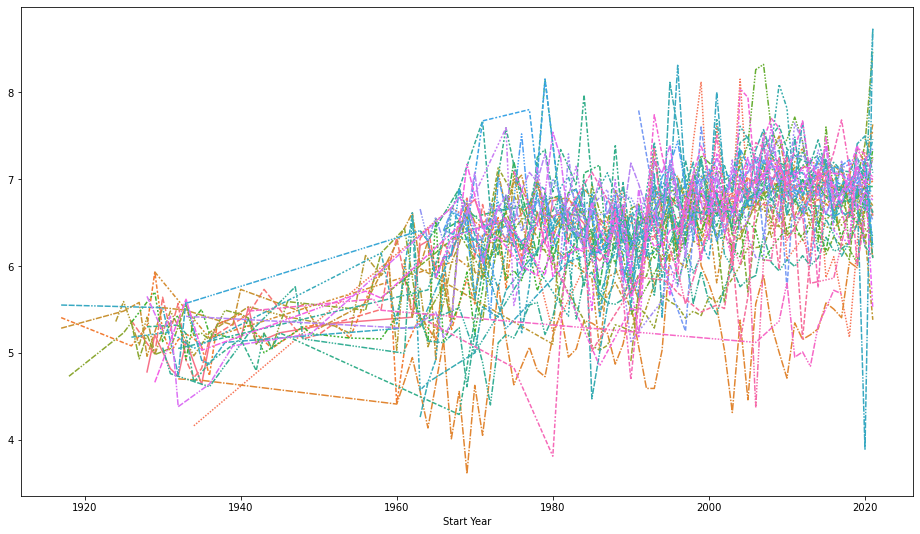

In [16]:
plt.figure(figsize=(16, 9))
sns.lineplot(score_by_genres_groupped_by_year.mean().iloc[:, :], legend=False)

In [17]:
score_by_genres_years

,Start Year,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
MAL_ID,,,,,,,,,,,,,,,,,,,,,
1,1998,8.78,8.78,NaN,8.78,NaN,NaN,8.78,NaN,NaN,...,NaN,8.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2001,8.39,NaN,NaN,NaN,NaN,NaN,8.39,NaN,NaN,...,NaN,8.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1998,8.24,8.24,NaN,8.24,NaN,NaN,8.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2002,7.27,NaN,NaN,NaN,NaN,NaN,7.27,NaN,NaN,...,NaN,NaN,NaN,NaN,7.27,NaN,NaN,NaN,NaN,NaN
8,2004,NaN,6.98,NaN,NaN,NaN,NaN,NaN,NaN,6.98,...,NaN,NaN,NaN,NaN,6.98,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,2021,NaN,NaN,NaN,6.59,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47402,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47614,2021,NaN,NaN,NaN,6.83,NaN,NaN,NaN,NaN,NaN,...,6.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taking the look for the score, the genres are highly correlated. Likely so since one movie contains multiple genres which make them correlated as well 

<Axes: >

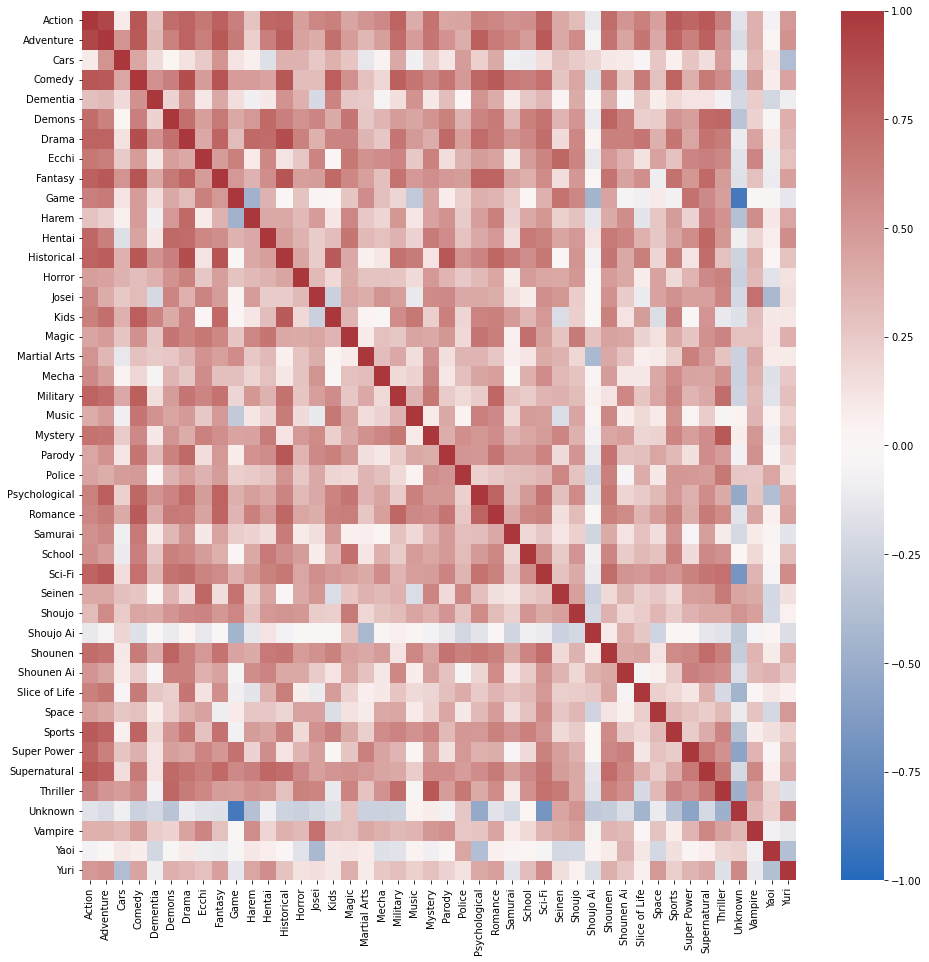

In [18]:
plt.figure(figsize=(16, 16))
sns.heatmap(score_by_genres_groupped_by_year.mean().corr(), cmap='vlag', vmax=1, vmin=-1)

<Axes: title={'center': 'Avg review rating on the anime relase year'}, xlabel='Start Year'>

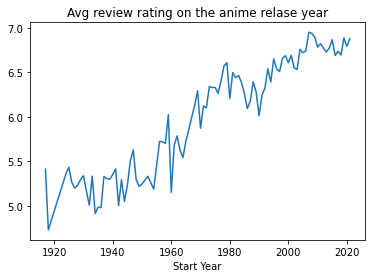

In [19]:
genres_year_avg = score_by_genres_groupped_by_year.mean()
genres_year_avg_T = genres_year_avg.T.mean()
plt.title('Avg review rating on the anime relase year')
sns.lineplot(genres_year_avg_T)

<Axes: title={'center': 'First order differencing of avg. rating on anime released year'}, xlabel='Start Year'>

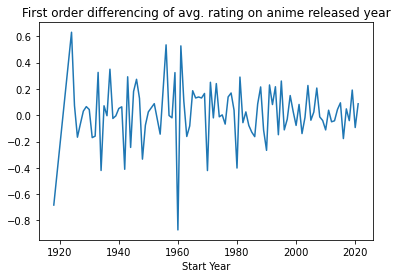

In [20]:
from pandas.plotting import autocorrelation_plot
genres_yearly_change = genres_year_avg_T.diff()
plt.title('First order differencing of avg. rating on anime released year')
sns.lineplot(genres_yearly_change)

In [138]:
sea_decomp = seasonal_decompose(genres_year_avg_T, model="additive", period=10)
sea_decomp

Text(0.513, 0.95, 'Avg. Score per year')

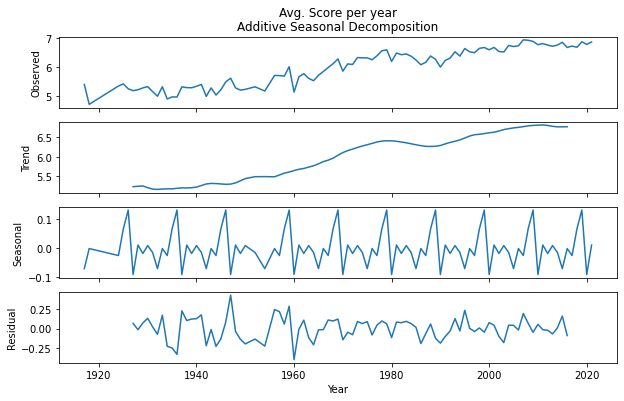

In [139]:

fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

axes[0].set_title("Additive Seasonal Decomposition")
axes[0].plot(sea_decomp.observed) # original/observed data
axes[0].set_ylabel("Observed")

axes[1].plot(sea_decomp.trend) # trend component
axes[1].set_ylabel("Trend")

axes[2].plot(sea_decomp.seasonal)
axes[2].set_ylabel("Seasonal") # seasonality component 

axes[3].plot(sea_decomp.resid) #  time series with the trend and seasonal components removed
axes[3].set_ylabel("Residual")

axes[3].set_xlabel("Year")
fig.suptitle("Avg. Score per year", x=0.513, y=0.95)

/Users/settasit/opt/anaconda3/envs/si671/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


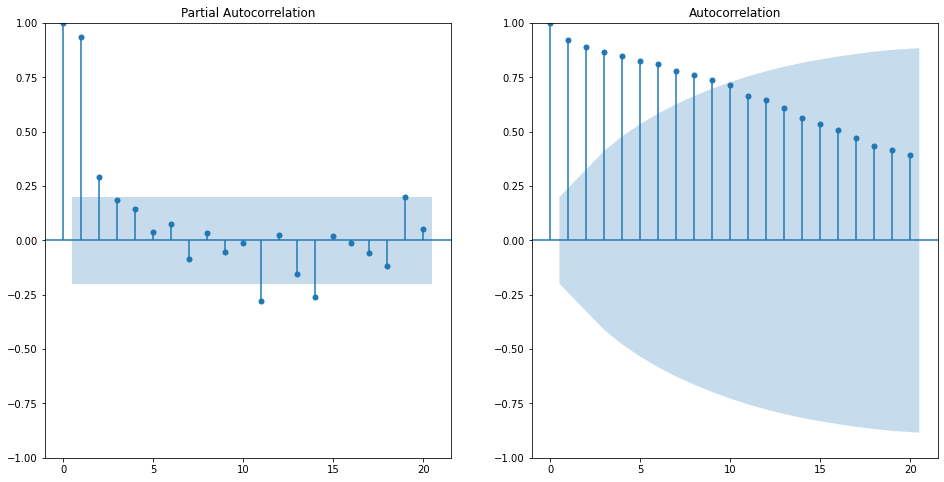

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
f, axs = plt.subplots(1, 2, figsize=(16, 8))
_ = plot_pacf(genres_year_avg_T, ax=axs[0])
_ = plot_acf(genres_year_avg_T, ax=axs[1])

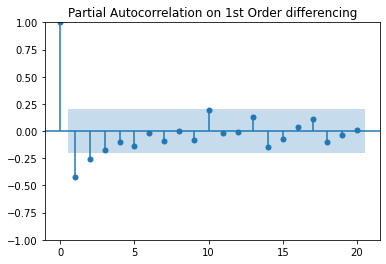

In [25]:
_ = plot_pacf(genres_yearly_change[1:], title='Partial Autocorrelation on 1st Order differencing')


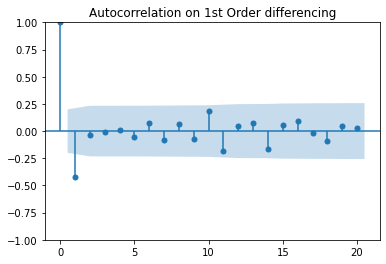

In [26]:
_ = plot_acf(genres_yearly_change[1:], title='Autocorrelation on 1st Order differencing')

In [162]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(genres_year_avg_T, order=(2, 1, 0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   97
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  19.945
Date:                Thu, 07 Dec 2023   AIC                            -33.890
Time:                        15:20:23   BIC                            -26.197
Sample:                             0   HQIC                           -30.780
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5404      0.105     -5.164      0.000      -0.746      -0.335
ar.L2         -0.2422      0.123     -1.970      0.049      -0.483      -0.001
sigma2         0.0385      0.005      7.494      0.0

/Users/settasit/opt/anaconda3/envs/si671/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/settasit/opt/anaconda3/envs/si671/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/settasit/opt/anaconda3/envs/si671/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


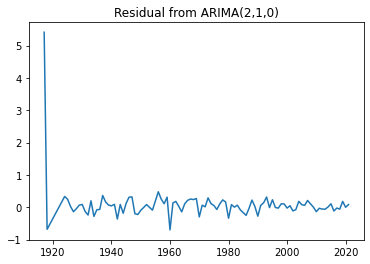

In [176]:
resid = pd.DataFrame(arima_model_fit.resid)
f = plt.figure(figsize=(6, 4))
plt.title('Residual from ARIMA(2,1,0)')
resid.columns = ['Residual from ARIMA(2,1,0)']
resid.index.name = 'Year'
plt.plot(resid)
plt.show()